# Distributional Space Models

A continuación mostramos varios DSMs obtenidos a partir del siguiente corpus:

In [1]:
import numpy as np
from itertools import combinations, chain
import matplotlib.pyplot as plt
from collections import defaultdict
from PCA import pca
from DSM import dsm

corpus = ['el gato mascota el perro es mascota el gato mascota el auto es maquina el avion maquina']

Para graficar las imágenes es importante definir una función que, además de plotear los puntos, indique a que palabra pertenece cada punto. Esta función se muestra a continuación

In [2]:
def plot_words(Z,ids): #La funcion recibe la matriz de datos y los ids de cada uno de los elementos
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label.decode('utf8'), xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()

Las funciones que siguen guardan el vocabulario y ids numéricos para identificar los índices de las entradas de la matriz de datos:

In [3]:
def vocab():
    dicc = defaultdict()
    dicc.default_factory = lambda: len(dicc)
    return dicc

def BoW(corpus,vocab):
    for w in corpus:
        yield[vocab[w_i] for w_i in w.split()]

Hay que recordar que el contexto de una palabra puede ser una ventana de $k\times k$ de tal forma que:
$$N(w_i) = \{w_j : w_j \text{ está en la ventana de } w_i\}$$

In [4]:
def get_context(C,size=3):
    l = 2*size + 1
    return [C[0][i:i+l] for i in xrange(len(C[0])-l+1)]

A partir de esto, podemos obtener los contextos.

In [52]:
words = vocab()
BagOfWords = list(BoW(corpus,words))

contexts = get_context(BagOfWords)

print contexts

[[0, 1, 2, 0, 3, 4, 2], [1, 2, 0, 3, 4, 2, 0], [2, 0, 3, 4, 2, 0, 1], [0, 3, 4, 2, 0, 1, 2], [3, 4, 2, 0, 1, 2, 0], [4, 2, 0, 1, 2, 0, 5], [2, 0, 1, 2, 0, 5, 4], [0, 1, 2, 0, 5, 4, 6], [1, 2, 0, 5, 4, 6, 0], [2, 0, 5, 4, 6, 0, 7], [0, 5, 4, 6, 0, 7, 6]]


Así, podemos definir una función de pesos, en este caso la función es la más simple y se define como: $$\phi(w_i,w_j) = \begin{cases} 1 & w_j \in N(w_i) \\ 0 & w_j \notin N(w_i) \end{cases}$$

In [53]:
def weight(x,y):
    x_cont = []
    for cont in contexts:
        if x in cont:
            x_cont.append(cont)
    if y in set(chain(*x_cont)):
        return 1
    else:
        return 0

A partir de esto, podemos generar la matriz $A \in \mathbb{R}^{V\times m}$ donde: $$A = (a_ij) = \phi(w_i,w_j)$$

Ya que la matriz, bajo esta función de pesos, es simétrica, podemos sólo calcular los pesos para la mitad de los datos y obtener la matriz completa como $A + A^T$.

In [54]:
N = len(words)
A = np.zeros((N,N))

for w1,w2 in combinations(words.values(),2):
    A[w1,w2] = weight(w1,w2)

A = A + A.T
print A

[[ 0.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  1.  0.  1.  1.]
 [ 1.  1.  1.  0.  1.  1.  0.  1.]
 [ 1.  0.  1.  0.  1.  1.  1.  0.]]


Finalmente, podemos graficar los puntos:

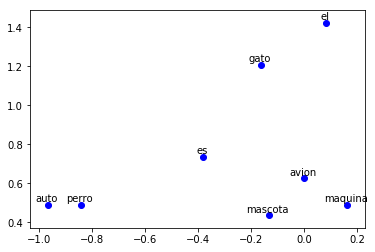

In [55]:
from operator import itemgetter
ids = [x[0] for x in sorted(words.iteritems(), key=itemgetter(1))] #Se reordenan los ids para que coincidan con los indices de la matriz
plot_words(pca(A),ids)

Otros modelos de DSM}

Se pueden obtener otras representaciones a partir de otros modelos de DSMs, por ejemplo, a partir de la función de PMI.

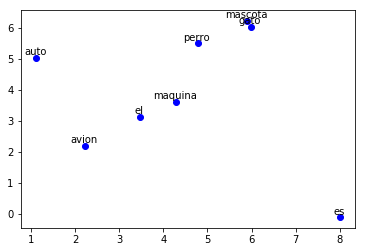

In [56]:
CC = [' '.join(s) for s in get_context([corpus[0].split()],5)]
A2, voc2 = dsm(CC, func = 'frec')

ids2 = [x[0] for x in sorted(words.iteritems(), key=itemgetter(1))]
plot_words(pca(A2),ids2)

Se puede utilizar también un modelo de PMI:

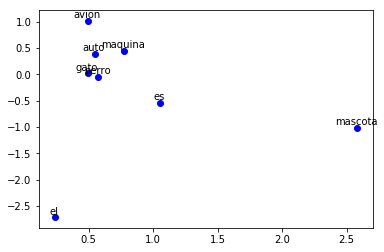

In [57]:
CC3 = [' '.join(s) for s in get_context([corpus[0].split()],5)]
A3, voc3 = dsm(CC3, func = 'pmi', )

ids3 = [x[0] for x in sorted(words.iteritems(), key=itemgetter(1))]
plot_words(pca(A3),ids3)